# Final project: Choice 2

## Integrating functions with infinite derivatives using Romberg integration

See the full project description on Canvas.

In this project you will implement Romberg integration in order to evaluate definite integrals.

Some skeleton code has been included below. The coding should be completed using Algorithm 4.2 from Burden and Faires. This book is available in the library. The details for the book are

* R L Burden, J D Faires and A M Burden. Numerical Analysis. Cengage Learning, 2016. 

  Library Shelf Mark: QA297 BURD

The book is also available as an ebook from the library. A direct link to it is given [here](http://www.vlebooks.com/vleweb/product/openreader?id=QnsBelfast&isbn=9781473737457).

# Python


### Main code for defining the function and the Romberg method

In [38]:
import numpy as np
import math
import matplotlib.pyplot as plt

####################
# define functions #
####################

# Define a function, y(x), that we wish to integrate
# INPUT 	- x: the point at which the function is evaluated
# OUTPUT	- y: the value of the function

def tfunc1(x):
    y = x**0.25
    return y

def tfunc2(x):
    y = 4 * x**4
    return y

	

##############
#  Main code #
##############

def romberg(func, a, b, n):
    # Initialize R array (n x n)
    R = np.zeros((n, n))
    
    # Step 1: Compute initial h and R[0, 0] using the trapezoidal rule
    h = b - a
    R[0, 0] = (h / 2) * (func(a) + func(b))
    
    # Output first approximation
    print(f"R[0, 0] = {R[0, 0]:.8f}")
    
    # Steps 2 and onwards: Compute the Romberg integration
    for i in range(1, n):
        h /= 2  # Halve the step size
        sum_f = 0
        num_new_points = 2 ** (i - 1)
        for k in range(1, num_new_points + 1):
            x = a + (2 * k - 1) * h
            sum_f += func(x)
        R[i, 0] = 0.5 * R[i - 1, 0] + h * sum_f  # Trapezoidal approximations
        
        # Richardson extrapolation
        for j in range(1, i + 1):
            R[i, j] = R[i, j - 1] + (R[i, j - 1] - R[i - 1, j - 1]) / (4 ** j - 1)
        
        # Output the current row
        print(f"\nRomberg Table after step {i}:")
        for j in range(i + 1):
            print(f"R[{i}, {j}] = {R[i, j]:.8f}")
        
    return R


# Define the interval [a, b] and the number of extrapolations n
a = 0
b = 1
n = 10  # Number of levels in the Romberg integration
exact_value = 4 / 5  # Exact value of the integral from 0 to 1

# Calculate Romberg tables and errors for both functions
print("Computing Romberg Integration for y = x^(1/4):")
R1 = romberg(tfunc1, a, b, n)
errors1 = [abs(R1[i, i] - exact_value) for i in range(n)]

print("\nComputing Romberg Integration for y = 4x^4:")
R2 = romberg(tfunc2, a, b, n)
errors2 = [abs(R2[i, i] - exact_value) for i in range(n)]



Computing Romberg Integration for y = x^(1/4):
R[0, 0] = 0.50000000

Romberg Table after step 1:
R[1, 0] = 0.67044821
R[1, 1] = 0.72726428

Romberg Table after step 2:
R[2, 0] = 0.74465201
R[2, 1] = 0.76938662
R[2, 2] = 0.77219477

Romberg Table after step 3:
R[3, 0] = 0.77650773
R[3, 1] = 0.78712630
R[3, 2] = 0.78830894
R[3, 3] = 0.78856472

Romberg Table after step 4:
R[4, 0] = 0.79006727
R[4, 1] = 0.79458712
R[4, 2] = 0.79508451
R[4, 3] = 0.79519206
R[4, 4] = 0.79521805

Romberg Table after step 5:
R[5, 0] = 0.79580993
R[5, 1] = 0.79772415
R[5, 2] = 0.79793329
R[5, 3] = 0.79797851
R[5, 4] = 0.79798944
R[5, 5] = 0.79799214

Romberg Table after step 6:
R[6, 0] = 0.79823483
R[6, 1] = 0.79904312
R[6, 2] = 0.79913106
R[6, 3] = 0.79915007
R[6, 4] = 0.79915466
R[6, 5] = 0.79915580
R[6, 6] = 0.79915609

Romberg Table after step 7:
R[7, 0] = 0.79925697
R[7, 1] = 0.79959768
R[7, 2] = 0.79963465
R[7, 3] = 0.79964265
R[7, 4] = 0.79964458
R[7, 5] = 0.79964506
R[7, 6] = 0.79964518
R[7, 7] = 0.799

### Error plotting

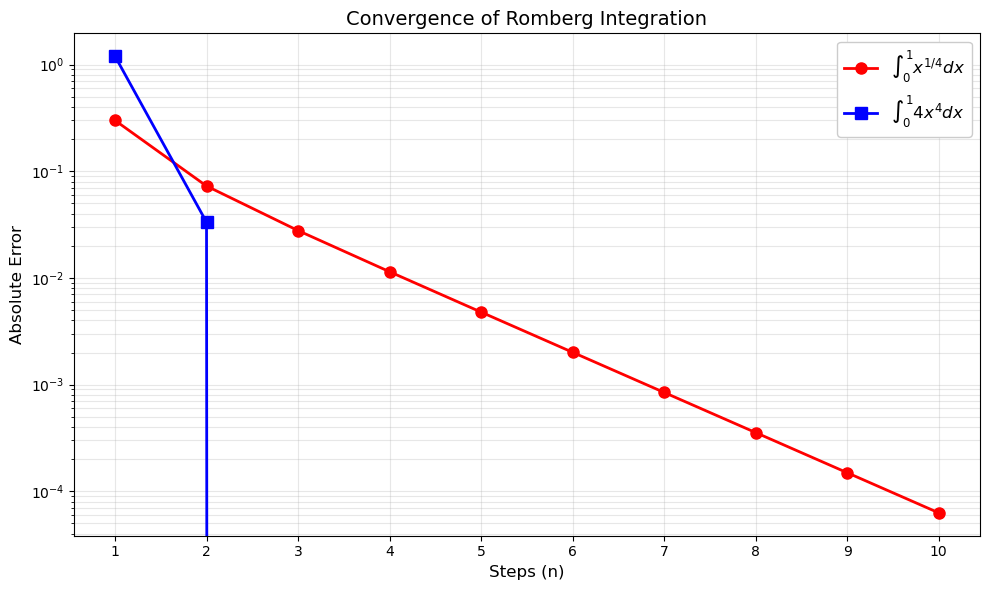

In [42]:
# Create the error plot
plt.figure(figsize=(10, 6))
steps = np.arange(1, n + 1)
plt.semilogy(steps, errors1, 'ro-', label=r'$\int_0^1 x^{1/4} dx$', linewidth=2, markersize=8)
plt.semilogy(steps, errors2, 'bs-', label=r'$\int_0^1 4x^4 dx$', linewidth=2, markersize=8)
plt.xticks(steps)
plt.xlabel('Steps (n)', fontsize=12)
plt.ylabel('Absolute Error', fontsize=12)
plt.title('Convergence of Romberg Integration', fontsize=14)
plt.grid(True, which='both', linestyle='-', alpha=0.3)
plt.legend(fontsize=12, framealpha=1)
plt.tight_layout()

plt.show()